## Problem One

In [1]:
###---Import Libraries---
import pandas as pd
import datetime
import matplotlib
import numpy as np

In [2]:
###---Import csv's from hard drive---
# Note that we can directly import from SQL using mysql but for this case, we will use csv's saved onto our hard drive 

df_customer = pd.read_csv('sprout_test_tables/customer.csv')
df_customer_logins = pd.read_csv('sprout_test_tables/customer_logins.csv')
df_login_history = pd.read_csv('sprout_test_tables/login_history.csv')


In [3]:
#---Convert login_date to 'days' when users logged in---

df_login_history['date_time'] = pd.to_datetime(df_login_history['login_date'])
df_login_history['day_logged_in'] = df_login_history['date_time'].dt.day_name()
df_login_history = df_login_history.drop(columns =['date_time'])


In [4]:
#daily customer login rates
#merge customer_id with df_login_history
df_one = df_login_history.merge(df_customer_logins, how='left', on='login_id')
df_two = df_one.merge(df_customer, how='left', on= 'customer_id')

#remove duplicate customer logins for each day (this will exclude instances where multiple users 
#are logging in under the same customer account)
df_active_customers = df_two.groupby(["login_date","day_logged_in", "customer_id","sprout_base_plan" ], 
                                     sort=False, as_index=False)["customer_id"].first()

In [5]:
# count distinct customer id logins per login date and respective day of the week
count = df_active_customers.groupby(['login_date', 'day_logged_in']).size().reset_index(name='customer_logins')
count['active_user_percent'] = (count['customer_logins'] / df_customer['customer_id'].count()) *100

# Find average daily login rate of April by summing customer_logins column and dividing result by 
#(total customers * numberof columns)
april_login_rate = 100 * count['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           count['customer_logins'].count())
print('Our average daily login rate for the month of April is ' + str(april_login_rate) + ' percent')



Our average daily login rate for the month of April is 37.015751383567476 percent


In [6]:
#comparing april weekend login rate average vs weekday login rate average

#seperate login rate df into customer login dataframes by day
count_group = count.groupby(count.day_logged_in)
sunday = count_group.get_group("Sunday")
saturday = count_group.get_group("Saturday")
friday = count_group.get_group("Friday")
thursday = count_group.get_group("Thursday")
wednesday = count_group.get_group("Wednesday")
tuesday = count_group.get_group("Tuesday")
monday = count_group.get_group("Monday")

#calculate weekday and weekend customer login averages for the month
weekend = sunday.append(saturday)
weekend_login_rate = 100 * weekend['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           weekend['customer_logins'].count())
print('Our average daily login rate for weekends is ' + str(weekend_login_rate) + ' percent')

weekday = friday.append([thursday, wednesday, tuesday, monday])
weekday_login_rate = 100 * weekday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           weekday['customer_logins'].count())
print('Our average daily login rate for weekdays is ' + str(weekday_login_rate) + ' percent')

Our average daily login rate for weekends is 14.929757343550447 percent
Our average daily login rate for weekdays is 48.05874840357599 percent


In [7]:
#show customer login rates for each day of the week during April
sunday_login_rate = 100 * sunday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           sunday['customer_logins'].count())
saturday_login_rate = 100 * saturday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           saturday['customer_logins'].count())
friday_login_rate = 100 * friday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           friday['customer_logins'].count())
thursday_login_rate = 100 * thursday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           thursday['customer_logins'].count())
wednesday_login_rate = 100 * wednesday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           wednesday['customer_logins'].count())
tuesday_login_rate = 100 * tuesday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           tuesday['customer_logins'].count())
monday_login_rate = 100 * monday['customer_logins'].sum() / (df_customer['customer_id'].count() * 
                                                           monday['customer_logins'].count())

print('Our average daily login rate for Sundays is ' + str(sunday_login_rate) + ' percent')
print('Our average daily login rate for Saturdays is ' + str(saturday_login_rate) + ' percent')
print('Our average daily login rate for Fridays is ' + str(friday_login_rate) + ' percent')
print('Our average daily login rate for Thursdays is ' + str(thursday_login_rate) + ' percent')
print('Our average daily login rate for Wednesdays is ' + str(wednesday_login_rate) + ' percent')
print('Our average daily login rate for Tuesdays is ' + str(tuesday_login_rate) + ' percent')
print('Our average daily login rate for Mondays is ' + str(monday_login_rate) + ' percent')

Our average daily login rate for Sundays is 15.862068965517242 percent
Our average daily login rate for Saturdays is 13.997445721583652 percent
Our average daily login rate for Fridays is 42.87994891443167 percent
Our average daily login rate for Thursdays is 48.40357598978289 percent
Our average daily login rate for Wednesdays is 49.87228607918263 percent
Our average daily login rate for Tuesdays is 49.265644955300125 percent
Our average daily login rate for Mondays is 49.87228607918263 percent


<AxesSubplot:>

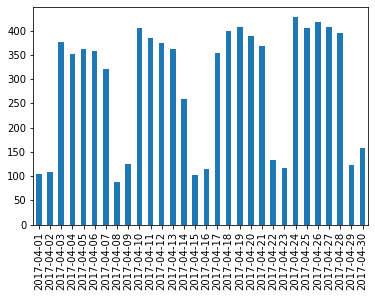

In [8]:
#graph number of customer logins per day
df_active_customers['login_date'].value_counts().sort_index().plot.bar()

#note that user logins are most frequent during weekdays and average weekly logins increase towards the end of the month

## Problem Two

<AxesSubplot:xlabel='login_date'>

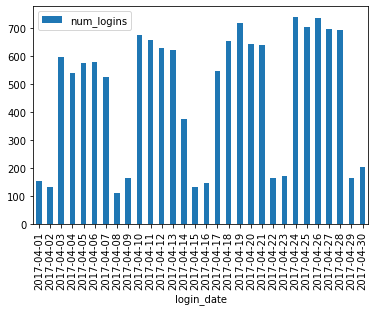

In [9]:
#graph total logins over time
total_logins = pd.DataFrame(df_login_history.groupby('login_date')['num_logins'].sum())
total_logins.plot.bar()

<AxesSubplot:xlabel='day_logged_in'>

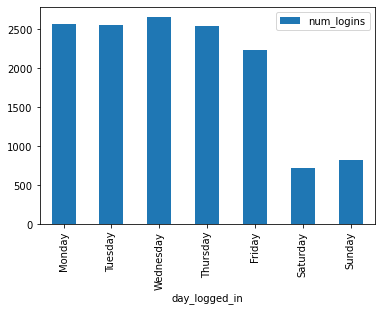

In [10]:
#total user logins by day over the month of April
total_logins_day = pd.DataFrame(df_login_history.groupby('day_logged_in')['num_logins'].sum())
total_logins_day.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar()


<AxesSubplot:xlabel='login_date'>

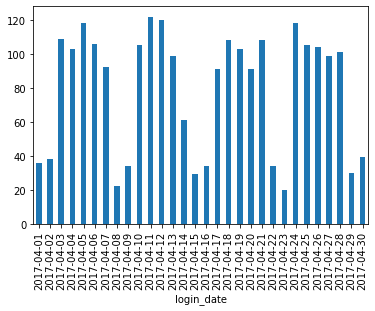

In [11]:
#total logins by plan type
total_logins_plan = pd.DataFrame(df_two.groupby('sprout_base_plan')['num_logins'].sum())

dx = df_two.reset_index().pivot_table(aggfunc = np.sum,dropna='False', index = 'login_date',
                                  columns = 'sprout_base_plan', values = 'num_logins' )
dx.fillna(0)
dx['Deluxe'].plot.bar(stacked=True)
#dx['Enterprise'].plot.bar(stacked=True)
#dx['Premium'].plot.bar(stacked=True)
#dx['Team'].plot.bar(stacked=True)


## Problem 3

array([[<AxesSubplot:title={'center':'num_logins'}>]], dtype=object)

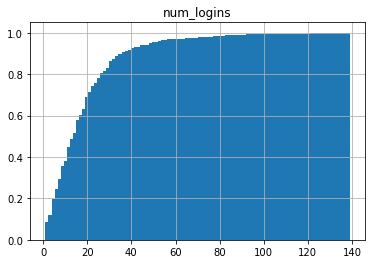

In [12]:
#total logins by customer
#get login numbers for each customer 
total_logins_customer = pd.DataFrame(df_two.groupby('customer_id')['num_logins'].sum())
#plot histogram to show cumulative distribution
total_logins_customer.hist(cumulative=True, density=1, bins=100)

In [16]:
#how many customers account for 90% of logins
#sort total_logins_customer ascending and sum num_logins until 90% of total is reached
total_logins_customer = total_logins_customer.sort_values(by=['num_logins'], ascending = False)

#count number of customer ids until we reach 90% of total 
total_customers = total_logins_customer.iloc[0:491].sum()
print('Customers needed to reach 90% of total logins: ' + str(491))

Customers needed to reach 90% of total logins: 491
